In [348]:
import pandas as pd

# Import the filtered dataset for 2019 to conduct some Exploratory Data Analysis
df_2019 = pd.read_csv("datasets/filtered/filtered_dataset_2019.csv")

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_96159/4281672709.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv("datasets/filtered/filtered_dataset_2019.csv")


In [349]:
# Preview the first 5 rows of the data
print("Preview of the 2019 Stack Overflow Developer Survey")
df_2019.head()

Preview of the 2019 Stack Overflow Developer Survey


,Unnamed: 0,Respondent,MainBranch,EdLevel,YearsCode,YearsCodePro,OrgSize,DevType,ConvertedComp,WorkRemote,LanguageWorkedWith
0,3,4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Less than 1 year,100 to 499 employees,"Developer, full-stack",61000.0,Less than once per month / Never,C;C++;C#;Python;SQL
1,4,5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",16,9,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",NaN,A few days each month,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
2,6,7,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",6,4,"Just me - I am a freelancer, sole proprietor, ...","Designer;Developer, front-end",NaN,All or almost all the time (I'm full-time remote),HTML/CSS;JavaScript
3,8,9,I am a developer by profession,Some college/university study without earning ...,12,4,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",95179.0,Less than once per month / Never,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
4,9,10,I am a developer by profession,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",12,10,"10,000 or more employees",Data or business analyst;Data scientist or mac...,13293.0,A few days each month,C#;Go;JavaScript;Python;R;SQL


In [350]:
# Get some basic information about the data
print("Basic information about the 2019 Stack Overflow Developer Survey")
df_2019.info()

Basic information about the 2019 Stack Overflow Developer Survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65679 entries, 0 to 65678
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          65679 non-null  int64  
 1   Respondent          65679 non-null  int64  
 2   MainBranch          65679 non-null  object 
 3   EdLevel             64426 non-null  object 
 4   YearsCode           65233 non-null  object 
 5   YearsCodePro        65109 non-null  object 
 6   OrgSize             62268 non-null  object 
 7   DevType             64494 non-null  object 
 8   ConvertedComp       50502 non-null  float64
 9   WorkRemote          63221 non-null  object 
 10  LanguageWorkedWith  65274 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.5+ MB


In [351]:
# Get some basic descriptive statistics
print("Descriptive statistics for the 2019 Stack Overflow Developer Survey")
df_2019.describe()

Descriptive statistics for the 2019 Stack Overflow Developer Survey


,Unnamed: 0,Respondent,ConvertedComp
count,65679.000000,65679.000000,5.050200e+04
mean,44187.827936,44462.199592,1.270082e+05
std,25521.921921,25688.112441,2.845674e+05
min,3.000000,4.000000,0.000000e+00
25%,22021.500000,22139.500000,2.565600e+04
50%,44227.000000,44508.000000,5.728700e+04
75%,66329.500000,66751.000000,1.000000e+05
max,88330.000000,88883.000000,2.000000e+06


In [352]:
# Find any duplicates
print("2019 Stack Overflow Developer Survey contains " + str(df_2019.duplicated().sum()) + " duplicates")

2019 Stack Overflow Developer Survey contains 0 duplicates


In [353]:
# Find any null values
print("Columns in the 2019 Stack Overflow Developer Surveyand how many null values")
df_2019.isnull().sum()

Columns in the 2019 Stack Overflow Developer Surveyand how many null values


Unnamed: 0                0
Respondent                0
MainBranch                0
EdLevel                1253
YearsCode               446
YearsCodePro            570
OrgSize                3411
DevType                1185
ConvertedComp         15177
WorkRemote             2458
LanguageWorkedWith      405
dtype: int64

In [354]:
# Assign the correct order to the ordinal variable EdLevel

# First, find and print all unique values in the EdLevel column
ed_level_values = df_2019["EdLevel"].unique()
print("Unique values for the EdLevel variable:")
print(ed_level_values)

Unique values for the EdLevel variable:
['Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)' 'Primary/elementary school'
 'Associate degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 nan 'Professional degree (JD, MD, etc.)'
 'I never completed any formal education']


In [355]:
# Assign an order to the EdLevel column
order_ed_level = ["I never completed any formal education",
                  "Primary/elementary school",
                  "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
                  "Associate degree",
                  "Some college/university study without earning a degree",
                  "Bachelor’s degree (BA, BS, B.Eng., etc.)",
                  "Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                  "Professional degree (JD, MD, etc.)",
                  "Other doctoral degree (Ph.D, Ed.D., etc.)"]

df_2019["EdLevel"] = pd.Categorical(df_2019["EdLevel"], categories=order_ed_level, ordered=True)

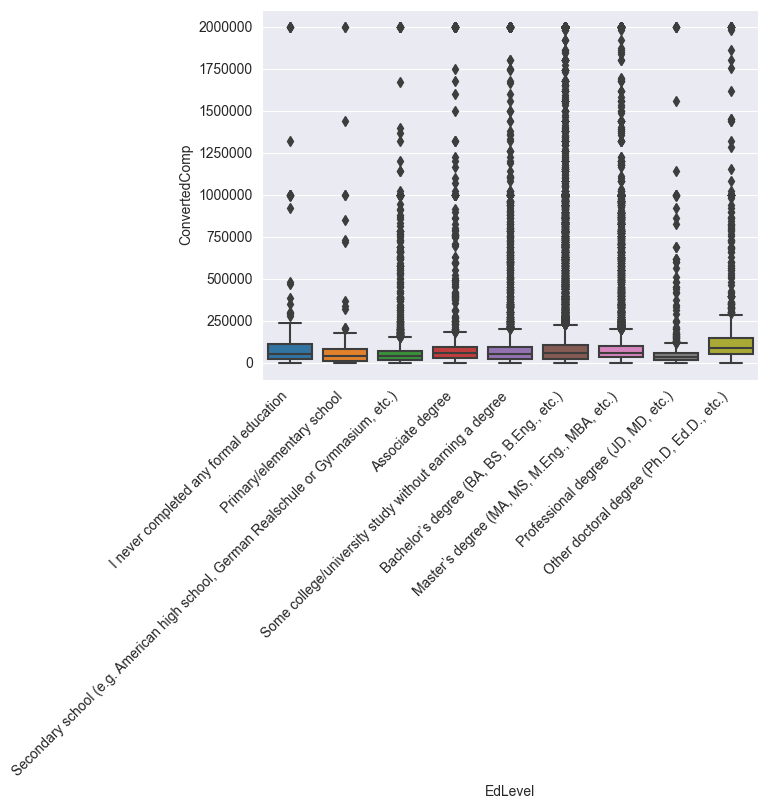

In [356]:
import seaborn as sns
from matplotlib import pyplot

# Create box plot of the data frame in current state ConvertedComp/EdLevel
box_plot_1 = sns.boxplot(df_2019[["EdLevel", "ConvertedComp"]], x="EdLevel", y="ConvertedComp")
box_plot_1.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_1.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_1 = box_plot_1.get_figure()
figure_1.savefig("figures/2019/edlevel_convertedcomp_boxplot.png", bbox_inches="tight")

In [357]:
# Remove the values containing text from the YearsCode column as they are preventing the order from being determined
df_2019 = df_2019[df_2019["YearsCode"] != "Less than 1 year"]
df_2019 = df_2019[df_2019["YearsCode"] != "More than 50 years"]
df_2019["YearsCode"] = pd.to_numeric(df_2019["YearsCode"])

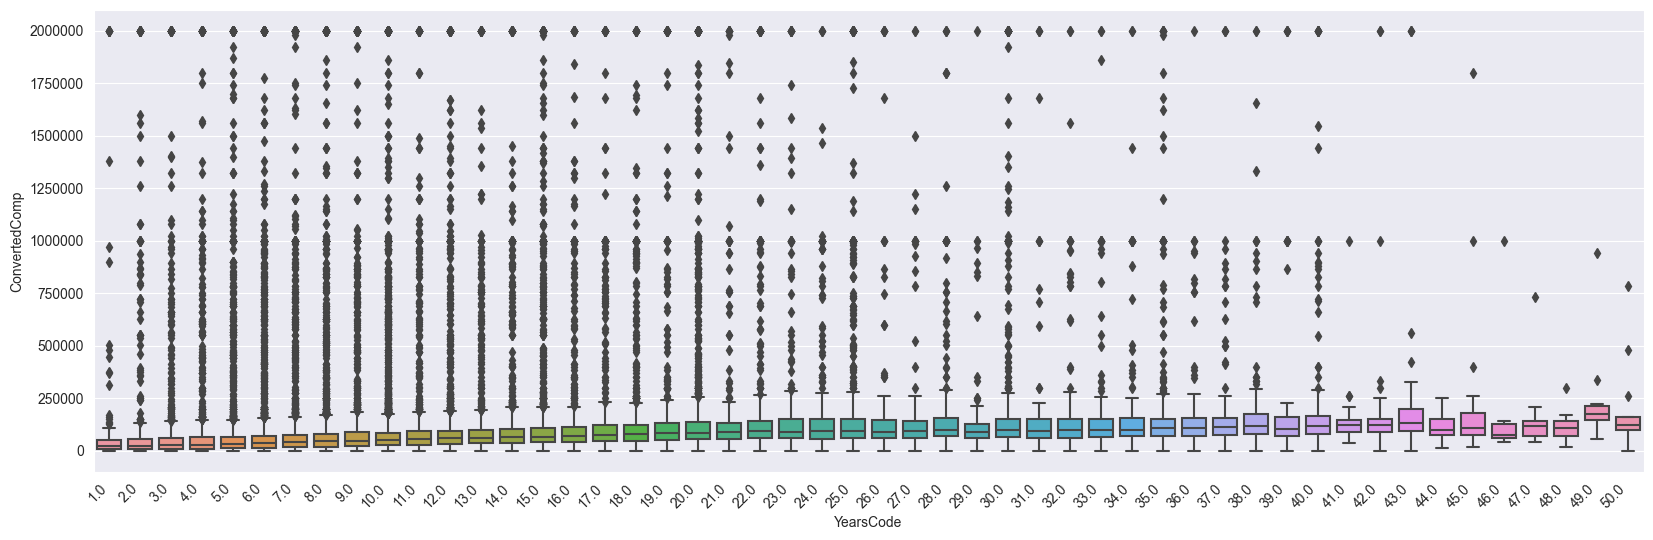

In [358]:
# Create box plot of the data frame in current state
pyplot.figure(figsize=(20, 6))
box_plot_2 = sns.boxplot(df_2019[["YearsCode", "ConvertedComp"]], x="YearsCode", y="ConvertedComp")
box_plot_2.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_2.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_2 = box_plot_2.get_figure()
figure_2.savefig("figures/2019/yearscode_convertedcomp_boxplot.png", bbox_inches="tight")

In [359]:
# Remove the values containing text from the YearsCodePro column as they are preventing the order from being determined
df_2019 = df_2019[df_2019["YearsCodePro"] != "Less than 1 year"]
df_2019 = df_2019[df_2019["YearsCodePro"] != "More than 50 years"]
df_2019["YearsCodePro"] = pd.to_numeric(df_2019["YearsCodePro"])

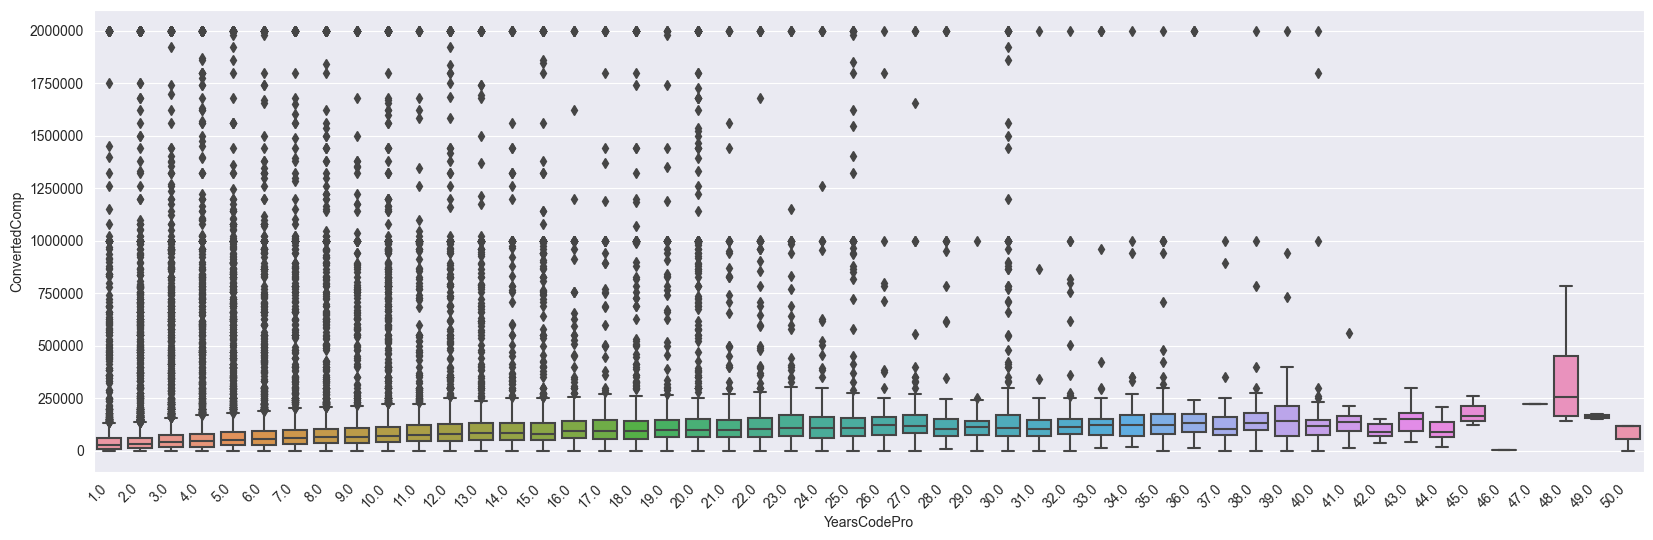

In [360]:
# Create box plot of the data frame in current state
pyplot.figure(figsize=(20, 6))
box_plot_3 = sns.boxplot(df_2019[["YearsCodePro", "ConvertedComp"]], x="YearsCodePro", y="ConvertedComp")
box_plot_3.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_3.ticklabel_format(style='plain', axis='y',useOffset=False)

figure_3 = box_plot_3.get_figure()
figure_3.savefig("figures/2019/yearscodepro_convertedcomp_boxplot.png", bbox_inches="tight")

In [361]:
# Assign the correct order to the ordinal variable OrgSize

# Find and print all unique values in the OrgSize column
org_size_values = df_2019["OrgSize"].unique()
print("Unique values for the OrgSize variable:")
print(org_size_values)

Unique values for the OrgSize variable:
['10,000 or more employees'
 'Just me - I am a freelancer, sole proprietor, etc.' '10 to 19 employees'
 '100 to 499 employees' '20 to 99 employees' '2-9 employees'
 '1,000 to 4,999 employees' nan '500 to 999 employees'
 '5,000 to 9,999 employees']


In [362]:
# Assign an order to the OrgSize column
order_org_size = ["Just me - I am a freelancer, sole proprietor, etc.",
                  "2-9 employees",
                  "10 to 19 employees",
                  "20 to 99 employees",
                  "100 to 499 employees",
                  "500 to 999 employees",
                  "1,000 to 4,999 employees",
                  "5,000 to 9,999 employees",
                  "10,000 or more employees"]

df_2019["OrgSize"] = pd.Categorical(df_2019["OrgSize"], categories=order_org_size, ordered=True)

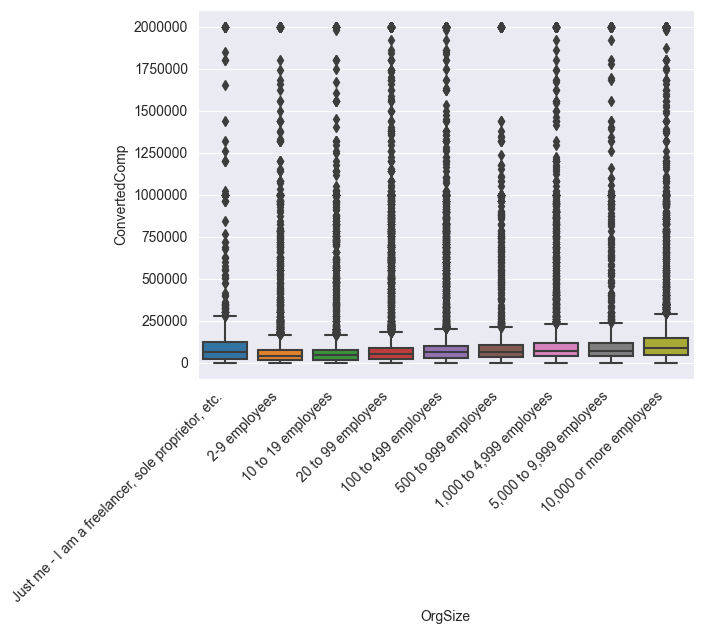

In [363]:
# Create box plot of the data frame in current state
box_plot_4 = sns.boxplot(df_2019[["OrgSize", "ConvertedComp"]], x="OrgSize", y="ConvertedComp")
box_plot_4.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_4.ticklabel_format(style='plain', axis='y',useOffset=False)

figure_4 = box_plot_4.get_figure()
figure_4.savefig("figures/2019/orgsize_convertedcomp_boxplot.png", bbox_inches="tight")

In [364]:
# Assign an order to the WorkRemote column - order from least to most remote work

# First, print all the unique values
workremote_values = df_2019["WorkRemote"].unique()
print("Unique values for the WorkRemote variable:")
print(workremote_values)

Unique values for the WorkRemote variable:
['A few days each month'
 "All or almost all the time (I'm full-time remote)"
 'Less than once per month / Never'
 'Less than half the time, but at least one day each week'
 'About half the time' "It's complicated"
 'More than half, but not all, the time' nan]


In [365]:
# Assign an order to the WorkRemote column
order_workremote = ["It's complicated",
                    "Less than once per month / Never",
                    "A few days each month",
                    "Less than half the time, but at least one day each week",
                    "About half the time",
                    "More than half, but not all, the time",
                    "All or almost all the time (I'm full-time remote)"]

df_2019["WorkRemote"] = pd.Categorical(df_2019["WorkRemote"], categories=order_workremote, ordered=True)

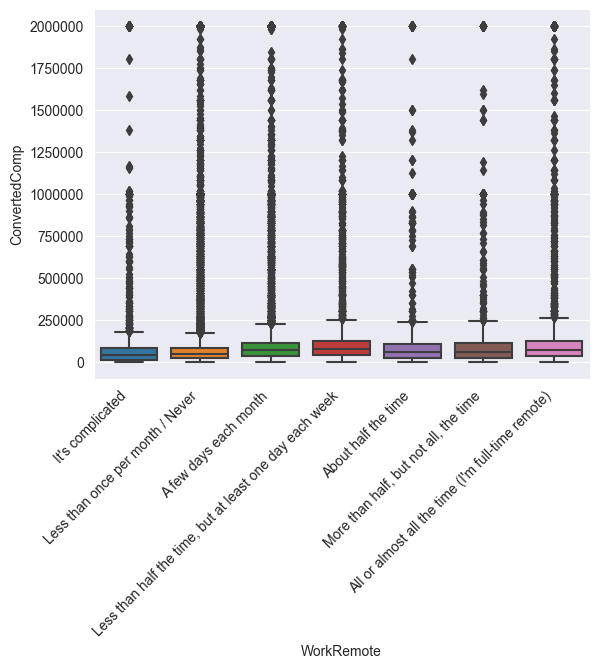

In [366]:
# Create box plot of the data frame in current state
box_plot_5 = sns.boxplot(df_2019[["WorkRemote", "ConvertedComp"]], x="WorkRemote", y="ConvertedComp")
box_plot_5.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_5.ticklabel_format(style='plain', axis='y',useOffset=False)

figure_5 = box_plot_5.get_figure()
figure_5.savefig("figures/2019/workremote_convertedcomp_boxplot.png", bbox_inches="tight")